# Supervised Learning - Ensemble Modeling, Random Forest Tree, Bagging, Boosting, Stacking and Voting 

In [1]:
# Build an ensemble model to correctly classify the outcome variable and improve your model prediction by using GridSearchCV using diabetes dataset.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as skmet
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.ensemble import VotingClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
diabetes_data = pd.read_csv(r"D:\360digi\DS\Sharath\Ensemble_Technique_2\handson\Datasets_ET\Diabeted_Ensemble.csv") 
diabetes_data

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
diabetes_data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [7]:
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Data Preprocessing

In [8]:
diabetes_data.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [9]:
# Target variable categories

diabetes_data[' Class variable'].unique()

array(['YES', 'NO'], dtype=object)

In [10]:
diabetes_data[' Class variable'].value_counts()

NO     500
YES    268
Name:  Class variable, dtype: int64

In [11]:
diabetes_data.shape

(768, 9)

In [12]:
# Data split into Input and Output
X = diabetes_data.iloc[:, :8]
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
diabetes_data['target'] = np.where(diabetes_data[' Class variable'] == 'YES', int(1), diabetes_data[' Class variable'] )
diabetes_data['target'] = np.where(diabetes_data['target'] == 'NO', int(0) , diabetes_data['target'] )

In [14]:
diabetes_data['target'].unique()

array([1, 0], dtype=object)

In [15]:
diabetes_data['target'] = diabetes_data['target'].apply(pd.to_numeric)

In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
 9   target                         768 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [17]:
#Y = diabetes_data[' Class variable']
# or
Y = diabetes_data['target']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [18]:
diabetes_data[' Class variable']

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
763     NO
764     NO
765     NO
766    YES
767     NO
Name:  Class variable, Length: 768, dtype: object

#### Separating Numeric and Non-Numeric columns

In [19]:
numeric_features = X.select_dtypes(exclude = ['object']).columns

In [20]:
numeric_features

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'],
      dtype='object')

### Outlier Analysis

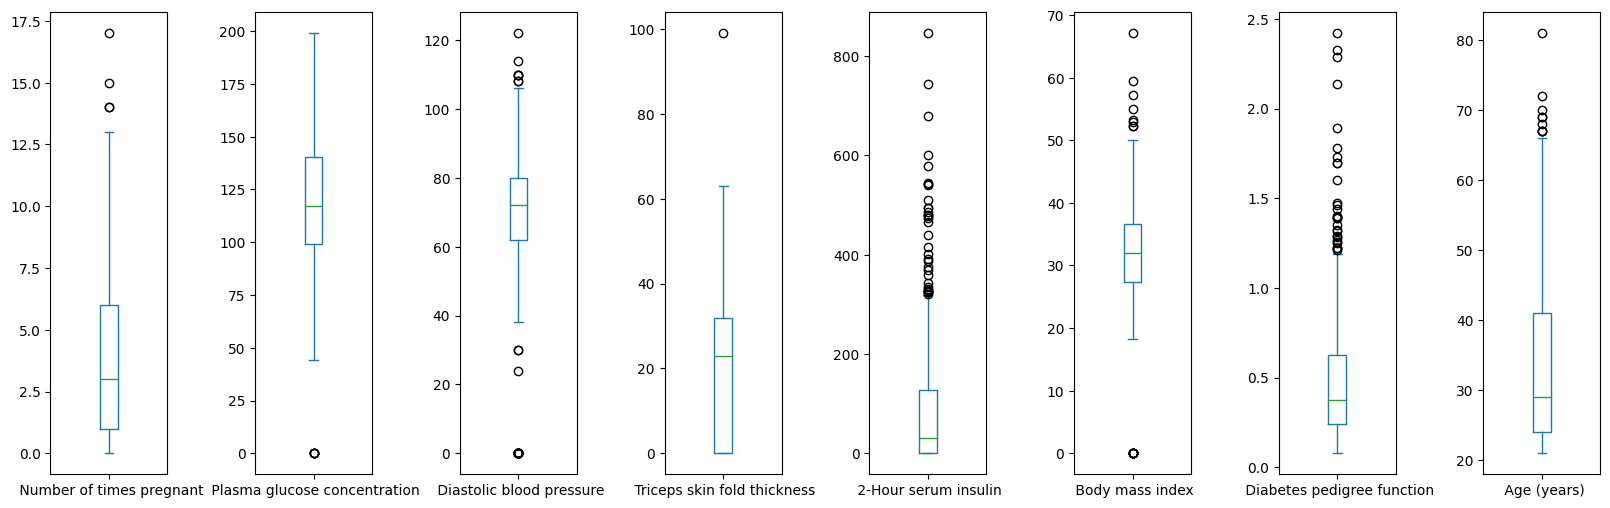

In [21]:
# Multiple boxplots in a single visualization.


X.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 

# increase spacing between subplots
plt.subplots_adjust(wspace = .75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [22]:
X.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'],
      dtype='object')

### Winsorization

In [23]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = [' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'])

In [24]:
cl = winsor.fit(X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']])

In [25]:
X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']] = cl.transform(X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']])

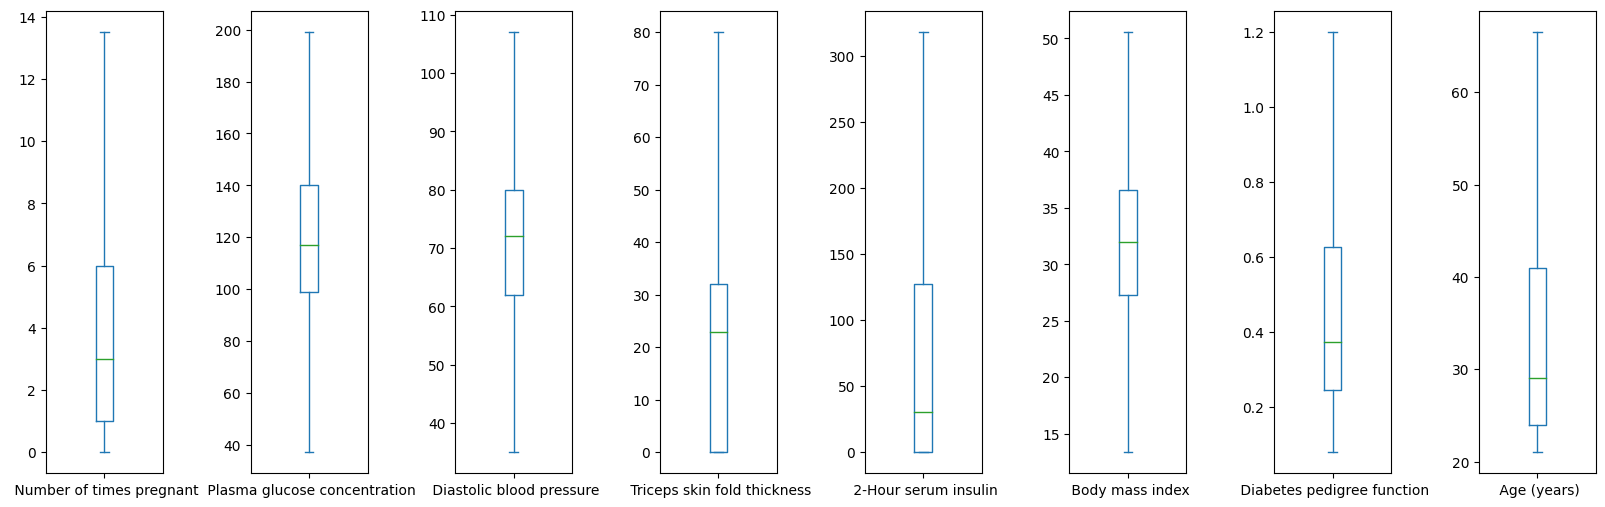

In [26]:
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

#### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [27]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [28]:
preprocess_pipeline = ColumnTransformer([('scale', scale_pipeline, numeric_features )])

In [29]:
processed = preprocess_pipeline.fit(X)

In [30]:
X_norm = pd.DataFrame(processed.transform(X))
X_norm

,0,1,2,3,4,5,6,7
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736
...,...,...,...,...,...,...,...,...
763,0.740741,0.394595,0.569444,0.6000,0.565815,0.525538,0.082888,0.923077
764,0.148148,0.524324,0.486111,0.3375,0.000000,0.630376,0.233512,0.131868
765,0.370370,0.518147,0.513889,0.2875,0.352063,0.345430,0.148841,0.197802
766,0.074074,0.549035,0.347222,0.0000,0.000000,0.450269,0.241533,0.571429


In [31]:
# Split data into train and test with Stratified sample technique

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [32]:
X_train.shape

(614, 8)

In [33]:
X_test.shape

(154, 8)

In [34]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 614)
print("\n")
print(Y_test.value_counts()/ 154)

0    0.651466
1    0.348534
Name: target, dtype: float64


0    0.649351
1    0.350649
Name: target, dtype: float64


# Random Forest Model

In [35]:
rf_Model = RandomForestClassifier()

#### Hyperparameters

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
n_estimators

[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

In [38]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


### Hyperparameter optimization with GridSearchCV

In [39]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)

In [40]:
rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [41]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [42]:
cv_rf_grid = rf_Grid.best_estimator_
cv_rf_grid

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_split=5,
                       n_estimators=10)

## Check Accuracy

In [43]:
# Evaluation on Test Data
test_pred = cv_rf_grid.predict(X_test)

accuracy_test = np.mean(test_pred == Y_test)
accuracy_test

0.7662337662337663

[Text(0.5, 1.0, 'Diabetes Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

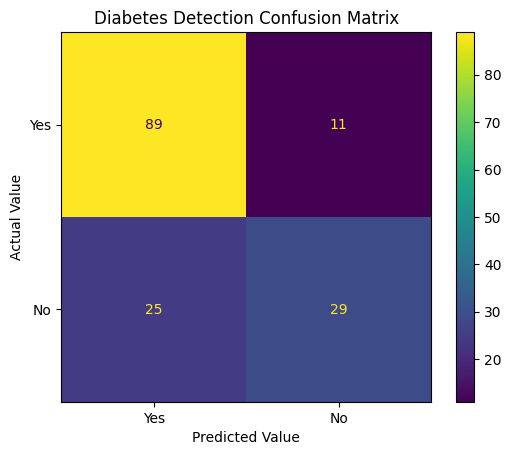

In [44]:
cm = skmet.confusion_matrix(Y_test, test_pred)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Yes', 'No'])
cmplot.plot()
cmplot.ax_.set(title = 'Diabetes Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [45]:
print (f'Train Accuracy - : {rf_Grid.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.809
Test Accuracy - : 0.766


In [46]:
# slight difference between training and test accuracy of 3% or 4% can be overfitting(since the dataset is small in size)

## Hyperparameter optimization with RandomizedSearchCV

In [47]:
rf_Random = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose = 0, n_jobs = -1)

In [48]:
rf_Random.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]})

In [49]:
rf_Random.best_params_

{'n_estimators': 64,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [50]:
cv_rf_random = rf_Random.best_estimator_
cv_rf_random

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='auto',
                       n_estimators=64)

In [51]:
# Evaluation on Test Data
test_pred_random = cv_rf_random.predict(X_test)

accuracy_test_random = np.mean(test_pred_random == Y_test)
accuracy_test_random

0.7727272727272727

[Text(0.5, 1.0, 'Oscar Nomination Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

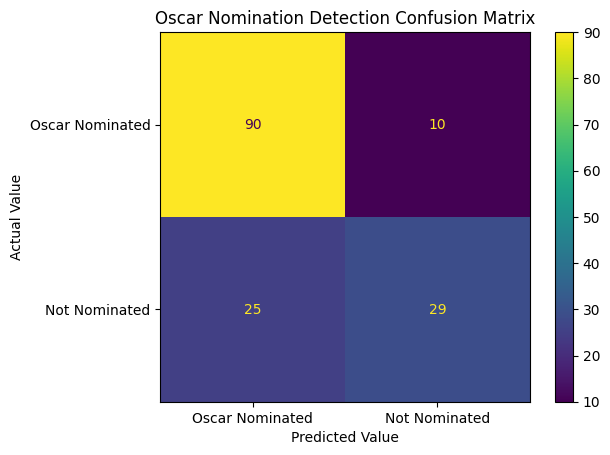

In [52]:
cm_random = skmet.confusion_matrix(Y_test, test_pred_random)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_random, display_labels = ['Oscar Nominated', 'Not Nominated'])
cmplot.plot()
cmplot.ax_.set(title = 'Oscar Nomination Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [53]:
print (f'Train Accuracy - : {rf_Random.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Random.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.831
Test Accuracy - : 0.773


In [54]:
# Overfit has even more increased as we used Randomsearch CV model to experiment and it did not do extensive training and test like GridSearchCV

## Cross Validation implementation

In [55]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv = 5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X = _X,
                           y = _y,
                           cv = _cv,
                           scoring = _scoring,
                           return_train_score = True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [56]:
Random_forest_result = cross_validation(cv_rf_random, X_train, Y_train, 5)

Random_forest_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.845214,83.754326,0.857143,0.849502,0.666667,0.650714,0.750000,0.736073,0.739837,73.942423,0.703704,0.672779,0.441860,0.49557,0.542857,0.569112
1,0.837067,83.754326,0.809524,0.849502,0.695906,0.650714,0.748428,0.736073,0.739837,73.942423,0.657143,0.672779,0.534884,0.49557,0.589744,0.569112
2,0.841141,83.754326,0.890756,0.849502,0.619883,0.650714,0.731034,0.736073,0.739837,73.942423,0.689655,0.672779,0.465116,0.49557,0.555556,0.569112
3,0.832994,83.754326,0.850394,0.849502,0.631579,0.650714,0.724832,0.736073,0.731707,73.942423,0.656250,0.672779,0.488372,0.49557,0.560000,0.569112
4,0.831301,83.754326,0.839695,0.849502,0.639535,0.650714,0.726073,0.736073,0.745902,73.942423,0.657143,0.672779,0.547619,0.49557,0.597403,0.569112


In [57]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12, 6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        plt.ylim(0.40000, 1)
        plt.bar(X_axis - 0.2, train_data, 0.1, color = 'blue', label = 'Training')
        plt.bar(X_axis + 0.2, val_data, 0.1, color = 'red', label = 'Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

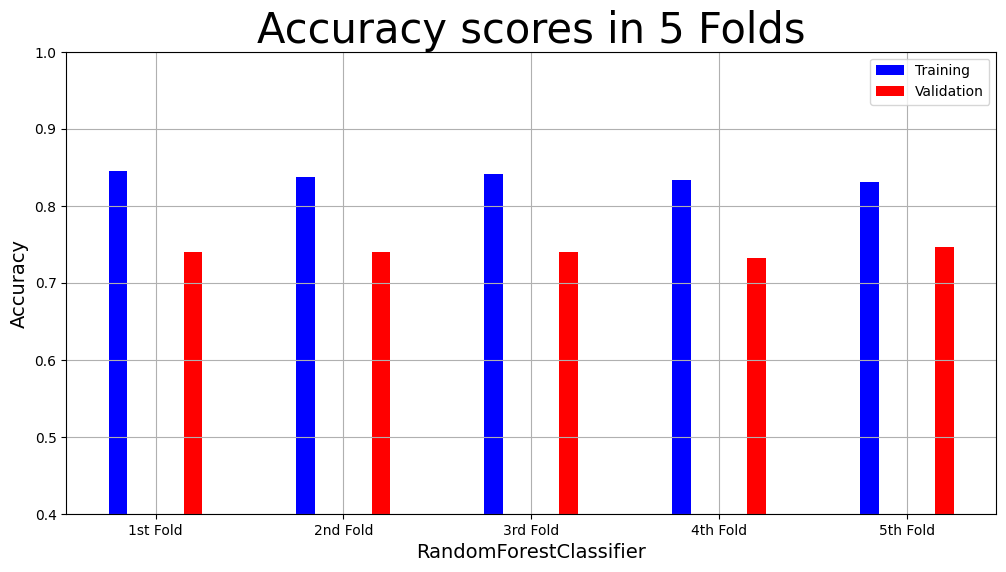

In [58]:
model_name = "RandomForestClassifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Random_forest_result["Training Accuracy scores"],
            Random_forest_result["Validation Accuracy scores"])

# Bagging Classifier Model

In [59]:
clftree = tree.DecisionTreeClassifier()

In [60]:

bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = -1, random_state = 42)

In [61]:
# Fit the model 
n_jobs = -1
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = -1, random_state = 42)
bagging = bag_clf.fit(X_train, Y_train)

In [62]:
print(confusion_matrix(Y_train, bagging.predict(X_train)))
print(accuracy_score(Y_train, bagging.predict(X_train)))
print('\n')
print(confusion_matrix(Y_test, bagging.predict(X_test)))
print(accuracy_score(Y_test, bagging.predict(X_test)))

[[400   0]
 [  0 214]]
1.0


[[90 10]
 [21 33]]
0.7987012987012987


In [63]:
bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, random_state=42)

In [64]:
# bag_clf.best_estimator_

## Cross Validation implementation

In [65]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [66]:
Bagging_cv_scores = cross_validation(bag_clf, X_train, Y_train, 5)

Bagging_cv_scores

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.723577,73.453285,0.604651,0.632681,0.604651,0.579734,0.604651,0.602378
1,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.731707,73.453285,0.619048,0.632681,0.604651,0.579734,0.611765,0.602378
2,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.739837,73.453285,0.677419,0.632681,0.488372,0.579734,0.567568,0.602378
3,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.739837,73.453285,0.648649,0.632681,0.558140,0.579734,0.600000,0.602378
4,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.737705,73.453285,0.613636,0.632681,0.642857,0.579734,0.627907,0.602378


In [67]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

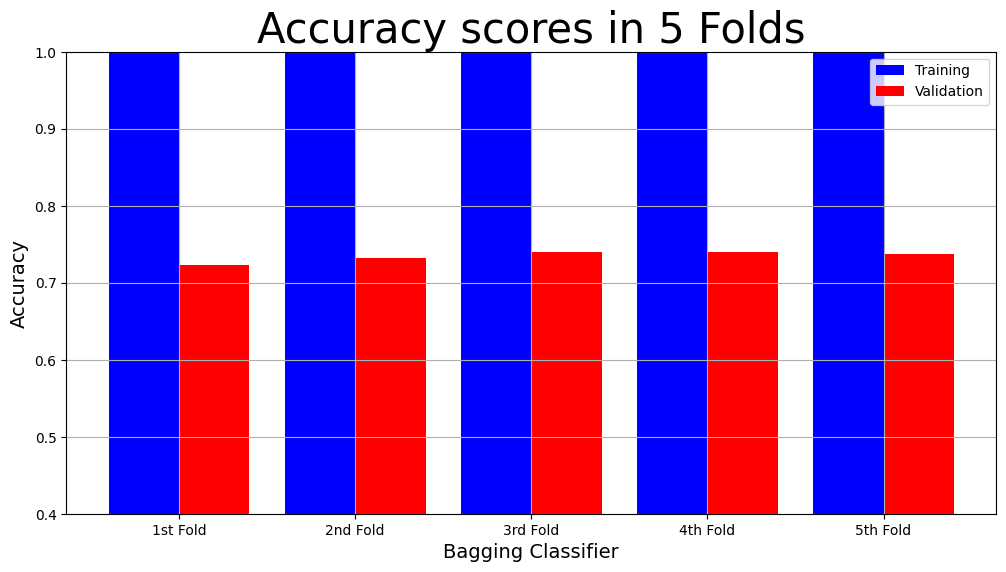

In [68]:
%matplotlib inline
model_name = "Bagging Classifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Bagging_cv_scores["Training Accuracy scores"],
            Bagging_cv_scores["Validation Accuracy scores"])

# AdaBoosting

In [69]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf1 = ada_clf.fit(X_train, Y_train)

In [70]:
predictions = ada_clf1.predict(X_test)

In [71]:
# ada_clf1.best_estimator_

In [72]:
# Evaluation on Testing Data
confusion_matrix(Y_test, predictions)

array([[90, 10],
       [25, 29]], dtype=int64)

In [73]:
accuracy_score(Y_test, predictions)

0.7727272727272727

In [74]:
# Evaluation on Training Data
accuracy_score(Y_train, ada_clf1.predict(X_train))


0.8322475570032574

# GradientBoosting

In [75]:
boost_clf = GradientBoostingClassifier()

boost_clf1 = boost_clf.fit(X_train, Y_train)

In [76]:
grad_pred = boost_clf1.predict(X_test)

In [77]:
boost_clf1

GradientBoostingClassifier()

In [78]:
print(confusion_matrix(Y_test, grad_pred))
print(accuracy_score(Y_test, grad_pred))

[[89 11]
 [19 35]]
0.8051948051948052


In [79]:
print(confusion_matrix(Y_train, boost_clf1.predict(X_train)))
print(accuracy_score(Y_train, boost_clf1.predict(X_train)))

[[385  15]
 [ 31 183]]
0.9250814332247557


In [80]:
# Hyperparameters
boost_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)

In [81]:
boost_clf_p = boost_clf2.fit(X_train, Y_train)

In [82]:
grad_pred_p = boost_clf_p.predict(X_test)

In [83]:
# boost_clf_p.best_estimator

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluation on Testing Data
print(confusion_matrix(Y_test, grad_pred_p))
print('\n')
print(accuracy_score(Y_test,grad_pred_p))

[[90 10]
 [23 31]]


0.7857142857142857


In [85]:
# Evaluation on Training Data
print(confusion_matrix(Y_train, boost_clf_p.predict(X_train)))
accuracy_score(Y_train, boost_clf_p.predict(X_train))

[[354  46]
 [ 74 140]]


0.8045602605863192

# XGBoosting

In [86]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, 
                            learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)

In [87]:
xgb_clf1 = xgb_clf.fit(X_train, Y_train)

In [88]:
xgb_pred = xgb_clf1.predict(X_test)

In [89]:
# Evaluation on Testing Data

print(confusion_matrix(Y_test, xgb_pred))

accuracy_score(Y_test, xgb_pred)

[[86 14]
 [23 31]]


0.7597402597402597

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

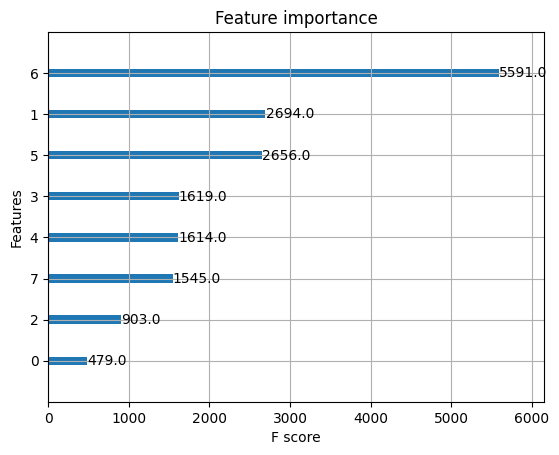

In [90]:
xgb.plot_importance(xgb_clf)

In [91]:
fi = pd.DataFrame(xgb_clf1.feature_importances_.reshape(1, -1), columns = X_train.columns)
fi

,0,1,2,3,4,5,6,7
0,0.188983,0.204146,0.174888,0.061328,0.049048,0.131722,0.043,0.146885


# RandomizedSearchCV for XGB

In [92]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)


In [93]:
# Grid Search
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0.9],
               'rag_alpha': [1e-2, 0.1, 1]}


xgb_RandomGrid = RandomizedSearchCV(estimator = xgb_clf, 
                                    param_distributions = param_test1, 
                                    cv = 5, verbose = 2, n_jobs = 4)

In [94]:
Randomized_search1 = xgb_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:21:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [95]:
cv_xg_clf = Randomized_search1.best_estimator_

cv_xg_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, rag_alpha=1, ...)

In [96]:
randomized_pred = cv_xg_clf.predict(X_test)

In [97]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(Y_test, randomized_pred)

0.8181818181818182

In [98]:
Randomized_search1.best_params_

{'subsample': 0.9,
 'rag_alpha': 1,
 'max_depth': 7,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

In [99]:
r_xgb = Randomized_search1.best_params_
r_xgb

{'subsample': 0.9,
 'rag_alpha': 1,
 'max_depth': 7,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

In [100]:
randomized_pred_1 = cv_xg_clf.predict(X_train)

In [101]:
# Evaluation on Training Data with model with hyperparameters
accuracy_score(Y_train, randomized_pred_1)

1.0

# Voting

In [ ]:
# Combine all three Voting Ensembles

In [102]:
type(r_xgb)

dict

In [103]:
estimators = [('rf', cv_rf_grid ), ('rand_rf', cv_rf_random), ('rand_xgb', cv_xg_clf)]
type(estimators)

list

In [104]:
# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")


In [105]:
# Fit classifier with the training data
hard_voting = ensemble_H.fit(X_train, Y_train)
hard_voting


[22:21:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=4,
                                                     min_samples_split=5,
                                                     n_estimators=10)),
                             ('rand_rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=4,
                                                     max_features='auto',
                                                     n_estimators=64)),
                             ('rand_xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_b...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, rag_alpha=1, ...))])

In [106]:
ensemble_H.score(X_test, Y_test)

0.7792207792207793

In [107]:
ensemble_S = VotingClassifier(estimators, voting = "soft")


In [108]:
soft_voting = ensemble_S.fit(X_train, Y_train)

[22:21:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [109]:
soft_voting.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [110]:
ensemble_S.score(X_test, Y_test)

0.7987012987012987